### Probabilistic lifetime value estimation with time projection

#### Customer Lifetime Value (CLTV) Calculation




**Customer Value** = Purchase Frequency x Avg Order Value

**CLTV** = Expected Number of Transaction x Expected Average Profit

**CLTV** =    BG/NBD MODEL          **X**      Gamma Gamma Submodel     


### Expected Number of Transactions
The purchasing behavior of the entire customer base will be modeled using a probability distribution. This probabilistic model will be conditioned on individual customer characteristics to estimate the expected number of transactions for each customer. By leveraging the general purchasing behavior pattern and tailoring it to individual customers, we can accurately predict the expected number of transactions on a per-customer basis.

### Expected Average Profit
The average profit for the entire customer base will be modeled using a probabilistic approach. This model will be conditioned on individual customer characteristics to estimate the conditional expected profit for each customer. By incorporating the overall distribution of average profit and adjusting for individual customer profiles, we can precisely calculate the expected average profit for each customer.


#### 2 MODELLING TECHNIQUES: 

- **BG/NBD MODEL- ** (Buy Till You Die)

- **--- Expected Number of Transaction


- **Gamma Gamma Submodel- **

- **---- Expected Average Profit


 #### A) BG-NBD MODEL (Beta Geometric/ Negative Binomial Distribution with Expected Number of Transaction)

**Transaction Process (BUY) + Dropout process (Till you die)**

**BG/NBD Model Overview:**

The BG/NBD model is a probabilistic model used to model customer behaviors. This model encompasses both customer purchase behavior and churn behavior.

**Transaction Process (Purchase Behavior):**
- Modeled using the Gamma distribution.
- Represents the number of transactions a customer can make within a certain time period.
- Predicts the number of transactions a customer will make within a given timeframe using the Poisson distribution.
- Transaction rates may vary for each customer, and a gamma distribution is used for the entire customer segment.

**Dropout Process (Churn Behavior):**
- Modeled using the Beta distribution.
- Represents the likelihood of a customer dropping out within a certain time period.
- Each customer has a dropout rate, denoted by the probability p.
- The dropout rate is predicted for the entire customer segment using a beta distribution.

The BG/NBD model is utilized to predict repeat purchase behaviors and churn probabilities over the customer lifetime. These predictions serve as valuable insights for determining marketing strategies and improving customer relationship management.


#### B)  Gamma-Gamma Modeli with Expected Average Profit

**Gamma-Gamma Model Overview:**

The Gamma-Gamma model is a statistical approach used to estimate the expected average profit per transaction for individual customers. Typically applied alongside the Pareto/NBD model, it enhances the accuracy of customer lifetime value (CLV) predictions.

**Expected Average Profit Calculation:**
- This model assumes that the monetary value of transactions follows a gamma distribution, hence the name "Gamma-Gamma" model.
- It estimates the average transaction value for each customer by calculating the mean of the gamma distribution.
- By incorporating this estimated average transaction value into the CLV calculation, the model captures variability in customer spending patterns.

**Key Features:**
- Utilizes transaction-level data to estimate the parameters of the gamma distribution.
- Assumes that the monetary value of transactions varies across customers, which is captured by the gamma distribution's parameters.
- Enables businesses to customize marketing strategies and pricing decisions based on individual customer profitability.

The Gamma-Gamma model is instrumental in improving CLV predictions by considering variations in customer spending behavior. It provides insights into customer profitability and informs strategic decisions aimed at maximizing long-term revenue.


### 1 ) Business Problem

### Task: Segmenting Customers Based on Purchase Data and Defining Marketing Strategies for Each Segment

### Dataset Story
The "Online Retail II" dataset contains sales data from an online retail store based in the UK. The dataset covers transactions from 01/12/2009 to 09/12/2011.

https://archive.ics.uci.edu/ml/datasets/Online+Retail+II

### Variables
- **InvoiceNo**: Invoice number. A unique number assigned to each transaction (invoice). If it starts with 'C', it indicates a cancelled transaction.
- **StockCode**: Product code. A unique number assigned to each product.
- **Description**: Product name.
- **Quantity**: Quantity of the product. Indicates how many units of the product were sold in each invoice.
- **InvoiceDate**: Invoice date and time.
- **UnitPrice**: Product price (in Sterling).
- **CustomerID**: Unique customer number.
- **Country**: Country name. The country where the customer resides.

This company specializes in selling gift items, and the majority of its customers are wholesalers, meaning they are corporate clients. The company aims to segment its corporate customers using BG/NBD MODEL and Gamma Gamma Submodel  metrics and tailor its engagement strategies specifically for each segment to enhance customer relationships and optimize marketing efforts.

### 2 ) Data Understanding

In [58]:
## Import the necessary library and functions


!pip install lifetimes
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
from lifetimes import BetaGeoFitter
from lifetimes import GammaGammaFitter
from lifetimes.plotting import plot_period_transactions
from sklearn.preprocessing import MinMaxScaler

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)
pd.set_option('display.float_format', lambda x: '%.4f' % x)


In [59]:
## The purpose of this function is to determine a threshold value for the given variable.

def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.01)
    quartile3 = dataframe[variable].quantile(0.99)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit



def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    # dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit


In [60]:
### Creating a copy of the dataframe to work on it without altering the original.

df_ = pd.read_excel("online_retail_II.xlsx", sheet_name="Year 2010-2011")
df = df_.copy()

In [61]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.5500,17850.0000,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.3900,17850.0000,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.7500,17850.0000,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.3900,17850.0000,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.3900,17850.0000,United Kingdom


In [62]:
## Summary of descriptive statistics for a DataFrame

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541910.0000,9.5522,218.0810,-80995.0000,1.0000,3.0000,10.0000,80995.0000
Price,541910.0000,4.6111,96.7598,-11062.0600,1.2500,2.0800,4.1300,38970.0000
Customer ID,406830.0000,15287.6842,1713.6031,12346.0000,13953.0000,15152.0000,16791.0000,18287.0000


In [6]:
## The total of missing values.

df.isnull().sum()

Invoice             0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
Price               0
Customer ID    135080
Country             0
dtype: int64

In [7]:
## Drop missing values

df.dropna(inplace=True)

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,406830.0000,12.0613,248.6931,-80995.0000,2.0000,5.0000,12.0000,80995.0000
Price,406830.0000,3.4605,69.3151,0.0000,1.2500,1.9500,3.7500,38970.0000
Customer ID,406830.0000,15287.6842,1713.6031,12346.0000,13953.0000,15152.0000,16791.0000,18287.0000


In [8]:
## This is due to the cancelled invoices. Let's remove the cancelled invoices from the data.

df = df[~df["Invoice"].str.contains("C", na=False)]

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,397925.0000,13.0218,180.4200,1.0000,2.0000,6.0000,12.0000,80995.0000
Price,397925.0000,3.1162,22.0968,0.0000,1.2500,1.9500,3.7500,8142.7500
Customer ID,397925.0000,15294.3086,1713.1727,12346.0000,13969.0000,15159.0000,16795.0000,18287.0000


In [9]:
df = df[df["Quantity"] > 0]
df = df[df["Price"] > 0]
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,397885.0000,12.9882,179.3316,1.0000,2.0000,6.0000,12.0000,80995.0000
Price,397885.0000,3.1165,22.0979,0.0010,1.2500,1.9500,3.7500,8142.7500
Customer ID,397885.0000,15294.4169,1713.1444,12346.0000,13969.0000,15159.0000,16795.0000,18287.0000


In [10]:
## Quantity 75%	      max                  Price   75%     max
#          #12#### 80995 #####                   ##3.75 ### 8142

## Replace outliers in variables with threshold values

replace_with_thresholds(df, "Quantity")
replace_with_thresholds(df, "Price")

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,397885.0000,11.8308,25.5231,1.0000,2.0000,6.0000,12.0000,298.5000
Price,397885.0000,2.8935,3.2272,0.0010,1.2500,1.9500,3.7500,37.0600
Customer ID,397885.0000,15294.4169,1713.1444,12346.0000,13969.0000,15159.0000,16795.0000,18287.0000


In [12]:
## The total price of each product. Not on a per-customer basis

df["TotalPrice"] = df["Quantity"] * df["Price"]
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0000,2010-12-01 08:26:00,2.5500,17850.0000,United Kingdom,15.3000
1,536365,71053,WHITE METAL LANTERN,6.0000,2010-12-01 08:26:00,3.3900,17850.0000,United Kingdom,20.3400
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0000,2010-12-01 08:26:00,2.7500,17850.0000,United Kingdom,22.0000
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0000,2010-12-01 08:26:00,3.3900,17850.0000,United Kingdom,20.3400
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0000,2010-12-01 08:26:00,3.3900,17850.0000,United Kingdom,20.3400


In [13]:
# The analysis date is defined as two days after the last date in the dataset.

df["InvoiceDate"].max()

Timestamp('2011-12-09 12:50:00')

In [14]:
today_date = dt.datetime(2011, 12, 11)

### 3 ) Data Preparation of Lifetime Structure

**recency**: Time elapsed since the last purchase. Weekly. (per user)

**T**: Customer's age. Weekly. (time since the first purchase was made before the analysis date)

**frequency**: Total number of repeated purchases (frequency>1)

**monetary**: Average earnings per purchase


In [15]:

cltv_df = df.groupby('Customer ID').agg(
    {'InvoiceDate': [lambda InvoiceDate: (InvoiceDate.max() - InvoiceDate.min()).days,
                     lambda InvoiceDate: (today_date - InvoiceDate.min()).days],
     'Invoice': lambda Invoice: Invoice.nunique(),
     'TotalPrice': lambda TotalPrice: TotalPrice.sum()})

cltv_df.head()

InvoiceDate             Invoice TotalPrice
             <lambda_0> <lambda_1> <lambda>   <lambda>
Customer ID                                           
12346.0000            0        326        1   310.4400
12347.0000          365        368        7  4310.0000
12348.0000          282        359        4  1770.7800
12349.0000            0         19        1  1491.7200
12350.0000            0        311        1   331.4600

In [16]:
cltv_df.columns = cltv_df.columns.droplevel(0)

cltv_df.head()

,<lambda_0>,<lambda_1>,<lambda>,<lambda>
Customer ID,,,,
12346.0000,0,326,1,310.4400
12347.0000,365,368,7,4310.0000
12348.0000,282,359,4,1770.7800
12349.0000,0,19,1,1491.7200
12350.0000,0,311,1,331.4600


In [17]:
## Renaming the columns of the cltv_df dataframe.

cltv_df.columns = ['recency', 'T', 'frequency', 'monetary']

cltv_df.head()

,recency,T,frequency,monetary
Customer ID,,,,
12346.0000,0,326,1,310.4400
12347.0000,365,368,7,4310.0000
12348.0000,282,359,4,1770.7800
12349.0000,0,19,1,1491.7200
12350.0000,0,311,1,331.4600


In [22]:
## Average earnings per purchase

cltv_df["monetary"] = cltv_df["monetary"] / cltv_df["frequency"]

#cltv_df = cltv_df[(cltv_df['frequency'] > 1)]

cltv_df.describe().T

,count,mean,std,min,25%,50%,75%,max
recency,2845.0000,198.9054,113.8670,0.0000,98.0000,207.0000,299.0000,373.0000
T,2845.0000,258.7842,102.9909,3.0000,192.0000,283.0000,359.0000,374.0000
frequency,2845.0000,5.9891,9.0442,2.0000,2.0000,4.0000,6.0000,209.0000
monetary,2845.0000,37.4842,56.0626,0.0035,6.9716,19.8234,48.0500,1147.7931


In [23]:
cltv_df["recency"] = cltv_df["recency"] / 7

cltv_df["T"] = cltv_df["T"] / 7

In [24]:
cltv_df.describe().T

,count,mean,std,min,25%,50%,75%,max
recency,2845.0000,28.4151,16.2667,0.0000,14.0000,29.5714,42.7143,53.2857
T,2845.0000,36.9692,14.7130,0.4286,27.4286,40.4286,51.2857,53.4286
frequency,2845.0000,5.9891,9.0442,2.0000,2.0000,4.0000,6.0000,209.0000
monetary,2845.0000,37.4842,56.0626,0.0035,6.9716,19.8234,48.0500,1147.7931


#### ESTABLISH OF BG/NBD MODEL 

In [25]:
bgf = BetaGeoFitter(penalizer_coef=0.001)

bgf.fit(cltv_df['frequency'],
        cltv_df['recency'],
        cltv_df['T'])

<lifetimes.BetaGeoFitter: fitted with 2845 subjects, a: 0.12, alpha: 11.41, b: 2.49, r: 2.18>

In [26]:
### ANALYZING BG/NBD

# Who are the 10 customers we expect to buy from the most in the week?

## 1 = A WEEK

bgf.conditional_expected_number_of_purchases_up_to_time(1,
                                                        cltv_df['frequency'],
                                                        cltv_df['recency'],
                                                        cltv_df['T']).sort_values(ascending=False).head(10)


Customer ID
12748.0000   3.2495
14911.0000   3.1264
17841.0000   1.9402
13089.0000   1.5374
14606.0000   1.4639
15311.0000   1.4336
12971.0000   1.3569
14646.0000   1.2064
13408.0000   0.9862
18102.0000   0.9685
dtype: float64

In [27]:
## CHANGE FUNC NAME

bgf.predict(1,
            cltv_df['frequency'],
            cltv_df['recency'],
            cltv_df['T']).sort_values(ascending=False).head(10)

Customer ID
12748.0000   3.2495
14911.0000   3.1264
17841.0000   1.9402
13089.0000   1.5374
14606.0000   1.4639
15311.0000   1.4336
12971.0000   1.3569
14646.0000   1.2064
13408.0000   0.9862
18102.0000   0.9685
dtype: float64

In [28]:
## Create a new column and named  expected_purc_1_week


cltv_df["expected_purc_1_week"] = bgf.predict(1,
                                              cltv_df['frequency'],
                                              cltv_df['recency'],
                                              cltv_df['T'])

cltv_df.head()

,recency,T,frequency,monetary,expected_purc_1_week
Customer ID,,,,,
12347.0000,52.1429,52.5714,7,12.5656,0.1413
12348.0000,40.2857,51.2857,4,27.6684,0.0920
12352.0000,37.1429,42.4286,8,3.4304,0.1824
12356.0000,43.1429,46.5714,3,104.1270,0.0862
12358.0000,21.2857,21.5714,2,143.8025,0.1223


In [29]:
# Who are the 10 customers we expect to buy from the most in the a month?

bgf.predict(4,
            cltv_df['frequency'],
            cltv_df['recency'],
            cltv_df['T']).sort_values(ascending=False).head(10)



Customer ID
12748.0000   12.9633
14911.0000   12.4722
17841.0000    7.7398
13089.0000    6.1330
14606.0000    5.8399
15311.0000    5.7191
12971.0000    5.4131
14646.0000    4.8119
13408.0000    3.9341
18102.0000    3.8636
dtype: float64

In [31]:
## Create a new column and named  expected_purc_1_month

cltv_df["expected_purc_1_month"] = bgf.predict(4,
                                               cltv_df['frequency'],
                                               cltv_df['recency'],
                                               cltv_df['T'])

cltv_df

,recency,T,frequency,monetary,expected_purc_1_week,expected_purc_1_month
Customer ID,,,,,,
12347.0000,52.1429,52.5714,7,12.5656,0.1413,0.5635
12348.0000,40.2857,51.2857,4,27.6684,0.0920,0.3668
12352.0000,37.1429,42.4286,8,3.4304,0.1824,0.7271
12356.0000,43.1429,46.5714,3,104.1270,0.0862,0.3435
12358.0000,21.2857,21.5714,2,143.8025,0.1223,0.4862
...,...,...,...,...,...,...
18272.0000,34.8571,35.2857,6,14.2527,0.1721,0.6856
18273.0000,36.4286,36.8571,3,7.5556,0.1043,0.4157
18282.0000,16.8571,18.1429,2,22.2563,0.1357,0.5392


In [32]:
## How many purchases can be made in a month?

bgf.predict(4,
            cltv_df['frequency'],
            cltv_df['recency'],
            cltv_df['T']).sum()

1776.893473220295

In [33]:
## What is the Expected Number of Sales of the Entire Company in 3 Months?

bgf.predict(4 * 3,
            cltv_df['frequency'],
            cltv_df['recency'],
            cltv_df['T']).sum()

5271.112433826363

In [34]:


cltv_df["expected_purc_3_month"] = bgf.predict(4 * 3,
                                               cltv_df['frequency'],
                                               cltv_df['recency'],
                                               cltv_df['T'])

#### Evaluation of Forecast Results

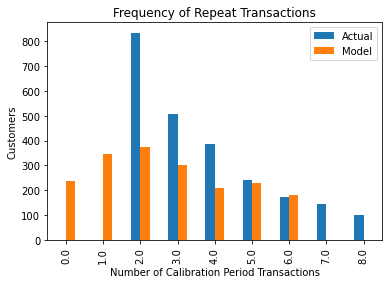

In [35]:
plot_period_transactions(bgf)
plt.show()

#### ESTABLISH OF GAMMA GAMMA MODEL 

In [37]:
ggf = GammaGammaFitter(penalizer_coef=0.01)

ggf.fit(cltv_df['frequency'], cltv_df['monetary'])


<lifetimes.GammaGammaFitter: fitted with 2845 subjects, p: 0.98, q: 0.38, v: 1.17>

In [38]:
ggf.conditional_expected_average_profit(cltv_df['frequency'],
                                        cltv_df['monetary']).head(10)


Customer ID
12347.0000    14.0094
12348.0000    33.2672
12352.0000     3.8862
12356.0000   132.7529
12358.0000   212.0372
12359.0000   102.3618
12360.0000   124.4813
12362.0000     5.7071
12363.0000   102.1864
12364.0000    24.7586
dtype: float64

In [39]:
ggf.conditional_expected_average_profit(cltv_df['frequency'],
                                        cltv_df['monetary']).sort_values(ascending=False).head(10)


Customer ID
12590.0000   1686.4424
12435.0000   1438.1748
16984.0000    823.4897
16253.0000    677.0960
16240.0000    643.8812
12406.0000    627.7970
13952.0000    597.6497
17672.0000    584.2674
17084.0000    542.3368
12438.0000    528.5252
dtype: float64

In [41]:
cltv_df["expected_average_profit"] = ggf.conditional_expected_average_profit(cltv_df['frequency'],
                                                                             cltv_df['monetary'])
cltv_df

,recency,T,frequency,monetary,expected_purc_1_week,expected_purc_1_month,expected_purc_3_month,expected_average_profit
Customer ID,,,,,,,,
12347.0000,52.1429,52.5714,7,12.5656,0.1413,0.5635,1.6784,14.0094
12348.0000,40.2857,51.2857,4,27.6684,0.0920,0.3668,1.0920,33.2672
12352.0000,37.1429,42.4286,8,3.4304,0.1824,0.7271,2.1631,3.8862
12356.0000,43.1429,46.5714,3,104.1270,0.0862,0.3435,1.0222,132.7529
12358.0000,21.2857,21.5714,2,143.8025,0.1223,0.4862,1.4388,212.0372
...,...,...,...,...,...,...,...,...
18272.0000,34.8571,35.2857,6,14.2527,0.1721,0.6856,2.0369,16.1665
18273.0000,36.4286,36.8571,3,7.5556,0.1043,0.4157,1.2352,10.0909
18282.0000,16.8571,18.1429,2,22.2563,0.1357,0.5392,1.5934,33.5411


In [42]:
cltv_df.sort_values("expected_average_profit", ascending=False).head(10)

,recency,T,frequency,monetary,expected_purc_1_week,expected_purc_1_month,expected_purc_3_month,expected_average_profit
Customer ID,,,,,,,,
12590.0000,0.0000,30.2857,2,1147.7931,0.0115,0.0460,0.1363,1686.4424
12435.0000,26.8571,38.2857,2,978.7363,0.0763,0.3041,0.9035,1438.1748
16984.0000,5.8571,18.7143,2,560.1688,0.1027,0.4084,1.2073,823.4897
16253.0000,26.8571,36.5714,2,460.4825,0.0800,0.3189,0.9473,677.0960
16240.0000,7.5714,11.1429,2,437.8650,0.1728,0.6858,2.0189,643.8812
12406.0000,23.0000,26.2857,2,426.9125,0.1055,0.4199,1.2444,627.7970
13952.0000,2.8571,34.1429,2,406.3839,0.0171,0.0681,0.2021,597.6497
17672.0000,37.0000,44.2857,2,397.2713,0.0707,0.2818,0.8381,584.2674
17084.0000,0.0000,5.1429,2,368.7188,0.2168,0.8578,2.5124,542.3368


### Calculation of CLTV with BG-NBD AND GG MODEL

In [43]:
cltv = ggf.customer_lifetime_value(bgf,
                                   cltv_df['frequency'],
                                   cltv_df['recency'],
                                   cltv_df['T'],
                                   cltv_df['monetary'],
                                   time=3,  # 3 MONTH
                                   freq="W",  # T'of frequency
                                   discount_rate=0.01)

cltv.head()

Customer ID
12347.0000    25.0175
12348.0000    38.6519
12352.0000     8.9427
12356.0000   144.3610
12358.0000   324.3708
Name: clv, dtype: float64

In [44]:
# Adjusting customer id in variables

cltv = cltv.reset_index()
cltv.head()

,Customer ID,clv
0,12347.0000,25.0175
1,12348.0000,38.6519
2,12352.0000,8.9427
3,12356.0000,144.3610
4,12358.0000,324.3708


In [45]:
## Merging two dataframe

cltv_final = cltv_df.merge(cltv, on="Customer ID", how="left")

cltv_final.head()

,Customer ID,recency,T,frequency,monetary,expected_purc_1_week,expected_purc_1_month,expected_purc_3_month,expected_average_profit,clv
0,12347.0000,52.1429,52.5714,7,12.5656,0.1413,0.5635,1.6784,14.0094,25.0175
1,12348.0000,40.2857,51.2857,4,27.6684,0.0920,0.3668,1.0920,33.2672,38.6519
2,12352.0000,37.1429,42.4286,8,3.4304,0.1824,0.7271,2.1631,3.8862,8.9427
3,12356.0000,43.1429,46.5714,3,104.1270,0.0862,0.3435,1.0222,132.7529,144.3610
4,12358.0000,21.2857,21.5714,2,143.8025,0.1223,0.4862,1.4388,212.0372,324.3708


In [46]:
cltv_final.sort_values(by="clv", ascending=False).head(10)


,Customer ID,recency,T,frequency,monetary,expected_purc_1_week,expected_purc_1_month,expected_purc_3_month,expected_average_profit,clv
1754,16000.0000,0.0000,0.4286,3,259.4578,0.4220,1.6639,4.8439,330.0490,1697.2150
2280,17084.0000,0.0000,5.1429,2,368.7188,0.2168,0.8578,2.5124,542.3368,1447.3187
49,12435.0000,26.8571,38.2857,2,978.7363,0.0763,0.3041,0.9035,1438.1748,1382.2447
1873,16240.0000,7.5714,11.1429,2,437.8650,0.1728,0.6858,2.0189,643.8812,1381.4417
1534,15531.0000,3.1429,4.4286,2,250.9300,0.2509,0.9922,2.9038,369.3588,1139.1502
223,12762.0000,2.4286,3.7143,2,237.3150,0.2625,1.0375,3.0338,349.3645,1125.6490
2225,16984.0000,5.8571,18.7143,2,560.1688,0.1027,0.4084,1.2073,823.4897,1056.9287
1246,14893.0000,0.2857,1.7143,2,154.7313,0.3006,1.1865,3.4598,228.0866,837.8767
51,12438.0000,17.8571,20.1429,2,359.3138,0.1264,0.5026,1.4864,528.5252,835.2493
28,12406.0000,23.0000,26.2857,2,426.9125,0.1055,0.4199,1.2444,627.7970,830.7980


### 4 ) Creating  CLTV Segments

In [47]:
cltv_final["segment"] = pd.qcut(cltv_final["clv"], 4, labels=["D", "C", "B", "A"])

cltv_final.head()

,Customer ID,recency,T,frequency,monetary,expected_purc_1_week,expected_purc_1_month,expected_purc_3_month,expected_average_profit,clv,segment
0,12347.0000,52.1429,52.5714,7,12.5656,0.1413,0.5635,1.6784,14.0094,25.0175,C
1,12348.0000,40.2857,51.2857,4,27.6684,0.0920,0.3668,1.0920,33.2672,38.6519,B
2,12352.0000,37.1429,42.4286,8,3.4304,0.1824,0.7271,2.1631,3.8862,8.9427,D
3,12356.0000,43.1429,46.5714,3,104.1270,0.0862,0.3435,1.0222,132.7529,144.3610,A
4,12358.0000,21.2857,21.5714,2,143.8025,0.1223,0.4862,1.4388,212.0372,324.3708,A


In [48]:
cltv_final.sort_values(by="clv", ascending=False).head(10)

,Customer ID,recency,T,frequency,monetary,expected_purc_1_week,expected_purc_1_month,expected_purc_3_month,expected_average_profit,clv,segment
1754,16000.0000,0.0000,0.4286,3,259.4578,0.4220,1.6639,4.8439,330.0490,1697.2150,A
2280,17084.0000,0.0000,5.1429,2,368.7188,0.2168,0.8578,2.5124,542.3368,1447.3187,A
49,12435.0000,26.8571,38.2857,2,978.7363,0.0763,0.3041,0.9035,1438.1748,1382.2447,A
1873,16240.0000,7.5714,11.1429,2,437.8650,0.1728,0.6858,2.0189,643.8812,1381.4417,A
1534,15531.0000,3.1429,4.4286,2,250.9300,0.2509,0.9922,2.9038,369.3588,1139.1502,A
223,12762.0000,2.4286,3.7143,2,237.3150,0.2625,1.0375,3.0338,349.3645,1125.6490,A
2225,16984.0000,5.8571,18.7143,2,560.1688,0.1027,0.4084,1.2073,823.4897,1056.9287,A
1246,14893.0000,0.2857,1.7143,2,154.7313,0.3006,1.1865,3.4598,228.0866,837.8767,A
51,12438.0000,17.8571,20.1429,2,359.3138,0.1264,0.5026,1.4864,528.5252,835.2493,A
28,12406.0000,23.0000,26.2857,2,426.9125,0.1055,0.4199,1.2444,627.7970,830.7980,A


In [49]:
## Analyzing of segment 

cltv_final.groupby("segment").agg(
    {"count", "mean", "sum"})


Customer ID                          recency                        T                    frequency               monetary                    expected_purc_1_week                 expected_purc_1_month                 expected_purc_3_month                  expected_average_profit                       clv                     
              count           sum       mean   count        sum    mean count        sum    mean     count   sum    mean    count        sum    mean                count      sum   mean                 count      sum   mean                 count       sum   mean                   count        sum     mean count         sum     mean
segment                                                                                                                                                                                                                                                                                                                                      
D               712 10991831.0000 15437.9649     712 26839.0000 37.6952   712 33594.7143 47.1836       712  8997 12.6362      712  4989.2282  7.0073                  712 160.8323 0.2259                   712 641.3705 0.9008                   712 1909.4774 2.6819                     712  6669.6620   9.3675   712   4697.6862   6.5979
C               711 10960724.0000 15415.9269     711 23623.8571 33.2262   711 29965.7143 42.1459       711  3823  5.3769      711 11099.6250 15.6113                  711  93.6151 0.1317                   711 373.0531 0.5247                   711 1108.8378 1.5595                     711 14321.2318  20.1424   711  15115.8035  21.2599
B               711 10863231.0000 15278.8059     711 18581.2857 26.1340   711 24858.2857 34.9624       711  2497  3.5120      711 23974.9159 33.7200                  711  89.3362 0.1256                   711 355.4393 0.4999                   711 1052.8955 1.4809                     711 32219.9375  45.3164   711  36370.0726  51.1534
A               711 10690425.0000 15035.7595     711 11796.7143 16.5917   711 16758.5714 23.5704       711  1722  2.4219      711 66578.8195 93.6411                  711 102.5429 0.1442                   711 407.0306 0.5725                   711 1199.9018 1.6876                     711 95375.3362 134.1425   711 146028.9541 205.3853

### FUNCTIONALIZATION

In [51]:
def create_cltv_p(dataframe, month=3):
    # 1. Veri Ön İşleme
    dataframe.dropna(inplace=True)
    dataframe = dataframe[~dataframe["Invoice"].str.contains("C", na=False)]
    dataframe = dataframe[dataframe["Quantity"] > 0]
    dataframe = dataframe[dataframe["Price"] > 0]
    replace_with_thresholds(dataframe, "Quantity")
    replace_with_thresholds(dataframe, "Price")
    dataframe["TotalPrice"] = dataframe["Quantity"] * dataframe["Price"]
    today_date = dt.datetime(2011, 12, 11)

    cltv_df = dataframe.groupby('Customer ID').agg(
        {'InvoiceDate': [lambda InvoiceDate: (InvoiceDate.max() - InvoiceDate.min()).days,
                         lambda InvoiceDate: (today_date - InvoiceDate.min()).days],
         'Invoice': lambda Invoice: Invoice.nunique(),
         'TotalPrice': lambda TotalPrice: TotalPrice.sum()})

    cltv_df.columns = cltv_df.columns.droplevel(0)
    cltv_df.columns = ['recency', 'T', 'frequency', 'monetary']
    cltv_df["monetary"] = cltv_df["monetary"] / cltv_df["frequency"]
    cltv_df = cltv_df[(cltv_df['frequency'] > 1)]
    cltv_df["recency"] = cltv_df["recency"] / 7
    cltv_df["T"] = cltv_df["T"] / 7

    # 2. BG-NBD Modelinin Kurulması
    bgf = BetaGeoFitter(penalizer_coef=0.001)
    bgf.fit(cltv_df['frequency'],
            cltv_df['recency'],
            cltv_df['T'])

    cltv_df["expected_purc_1_week"] = bgf.predict(1,
                                                  cltv_df['frequency'],
                                                  cltv_df['recency'],
                                                  cltv_df['T'])

    cltv_df["expected_purc_1_month"] = bgf.predict(4,
                                                   cltv_df['frequency'],
                                                   cltv_df['recency'],
                                                   cltv_df['T'])

    cltv_df["expected_purc_3_month"] = bgf.predict(12,
                                                   cltv_df['frequency'],
                                                   cltv_df['recency'],
                                                   cltv_df['T'])

    # 3. GAMMA-GAMMA Modelinin Kurulması
    ggf = GammaGammaFitter(penalizer_coef=0.01)
    ggf.fit(cltv_df['frequency'], cltv_df['monetary'])
    cltv_df["expected_average_profit"] = ggf.conditional_expected_average_profit(cltv_df['frequency'],
                                                                                 cltv_df['monetary'])

    # 4. BG-NBD ve GG modeli ile CLTV'nin hesaplanması.
    cltv = ggf.customer_lifetime_value(bgf,
                                       cltv_df['frequency'],
                                       cltv_df['recency'],
                                       cltv_df['T'],
                                       cltv_df['monetary'],
                                       time=month,  # 3 aylık
                                       freq="W",  # T'nin frekans bilgisi.
                                       discount_rate=0.01)

    cltv = cltv.reset_index()
    cltv_final = cltv_df.merge(cltv, on="Customer ID", how="left")
    cltv_final["segment"] = pd.qcut(cltv_final["clv"], 4, labels=["D", "C", "B", "A"])

    return cltv_final


In [53]:
df_1= df_.copy()

df_1.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.5500,17850.0000,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.3900,17850.0000,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.7500,17850.0000,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.3900,17850.0000,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.3900,17850.0000,United Kingdom


In [55]:
cltv_final2 = create_cltv_p(df_1)

In [56]:
cltv_final2

,Customer ID,recency,T,frequency,monetary,expected_purc_1_week,expected_purc_1_month,expected_purc_3_month,expected_average_profit,clv,segment
0,12347.0000,52.1429,52.5714,7,615.7143,0.1413,0.5635,1.6784,631.9123,1128.4477,A
1,12348.0000,40.2857,51.2857,4,442.6950,0.0920,0.3668,1.0920,463.7460,538.8089,B
2,12352.0000,37.1429,42.4286,8,219.5425,0.1824,0.7271,2.1631,224.8868,517.5000,B
3,12356.0000,43.1429,46.5714,3,937.1433,0.0862,0.3435,1.0222,995.9989,1083.0903,A
4,12358.0000,21.2857,21.5714,2,575.2100,0.1223,0.4862,1.4388,631.9022,966.6727,A
...,...,...,...,...,...,...,...,...,...,...,...
2840,18272.0000,34.8571,35.2857,6,513.0967,0.1721,0.6856,2.0369,529.0185,1146.2057,A
2841,18273.0000,36.4286,36.8571,3,68.0000,0.1043,0.4157,1.2352,73.4942,96.5648,D
2842,18282.0000,16.8571,18.1429,2,89.0250,0.1357,0.5392,1.5934,99.5249,168.5946,D
2843,18283.0000,47.5714,48.2857,16,130.9300,0.3017,1.2034,3.5831,132.6012,505.5117,C


In [57]:
cltv_final2.to_csv("cltv_prediction.csv")